<a href="https://colab.research.google.com/github/DaniilZebzeev/HSE_synthetic_data_economy/blob/main/synthetic_data_economy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Synthetic Data Analysis**

### **Generation of Synthetic Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


np.random.seed(13)
n = 500

In [2]:
# Macroeconomic indicators
gdp = np.random.normal(50000, 10000, n)
inflation = np.random.normal(6, 1.5, n)
ai_investments = np.random.normal(2000, 300, n) + 0.04 * gdp
unemployment = np.clip(10 - (gdp - gdp.mean()) / 8000 + np.random.normal(0, 1, n), 3, 18)
interest_rate = np.clip(2 + 0.4 * (inflation - inflation.mean()) + np.random.normal(0, 0.3, n), 0.5, 12)

# Consumer-level variable
consumer_spending = 0.25 * gdp + np.random.normal(0, 4000, n)


In [3]:
# Final synthetic dataset
df = pd.DataFrame({
    "GDP": gdp,
    "Inflation": inflation,
    "AI_Investments": ai_investments,
    "Unemployment": unemployment,
    "Interest Rate": interest_rate,
    "Consumer_Spending": consumer_spending
})

df.head()

,GDP,Inflation,AI_Investments,Unemployment,Interest Rate,Consumer_Spending
0,42876.093379,5.341000,3492.564994,10.253972,1.623433,13764.004608
1,57537.663787,5.572067,4057.409027,7.740558,2.101430,18238.008196
2,49554.969217,6.617916,3315.144612,10.102850,2.166886,12522.898746
3,54518.123387,4.332848,4064.986352,8.902331,1.576610,10793.892598
4,63451.017085,8.121755,4350.505818,8.135612,2.816461,10325.454455


### **Visual Exploration of Synthetic Economic Relationships**

Before moving to statistical models, we examine several key relationships in the synthetic economy.

<u>*These plots help verify whether the generated data behave in an economically meaningful way:*</u>

- whether higher national income translates into stronger household spending,

- whether labour-market conditions follow the expected cyclical pattern,

- and whether monetary policy reacts to deviations of inflation from its long-run average.

If the synthetic data mimic these well-known macroeconomic patterns, it suggests that the underlying generation process is realistic and suitable for further analysis.

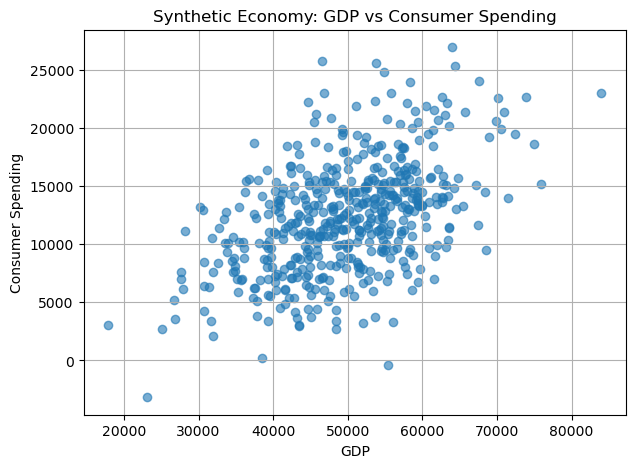

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(df["GDP"], df["Consumer_Spending"], alpha=0.6)
plt.title("Synthetic Economy: GDP vs Consumer Spending")
plt.xlabel("GDP")
plt.ylabel("Consumer Spending")
plt.grid(True)
plt.show()


- The scatter plot shows a clear ***upward trend***: <u>higher GDP levels are associated with higher consumer spending</u>.

- This is exactly what we expect from a consumption-driven economy, where income growth enables households to increase their expenditures.

- The noticeable vertical dispersion reflects the random noise intentionally added to the spending equation, capturing unpredictable consumer behavior and idiosyncratic shocks that occur even in stable macroeconomic environments.

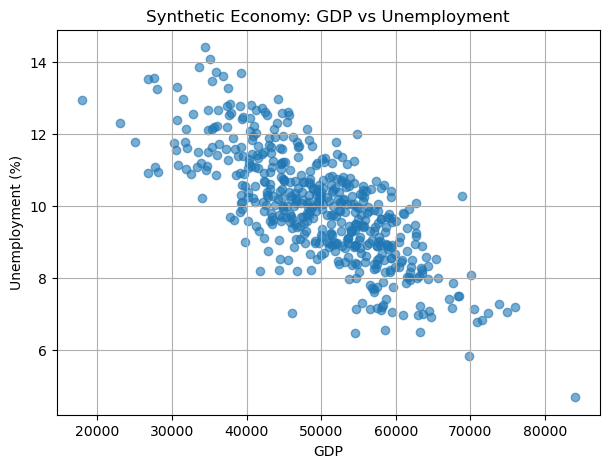

In [5]:
plt.figure(figsize=(7,5))
plt.scatter(df["GDP"], df["Unemployment"], alpha=0.6)
plt.title("Synthetic Economy: GDP vs Unemployment")
plt.xlabel("GDP")
plt.ylabel("Unemployment (%)")
plt.grid(True)
plt.show()

- A ***strong downward-sloping*** relationship is observed.

- <u>As GDP rises, unemployment rates systematically fall</u>, producing a synthetic analogue of Okun’s law.

- The spread reflects short-term labor market frictions and random fluctuations, making the synthetic unemployment variable behave similarly to real-world data rather than following a strict deterministic formula.

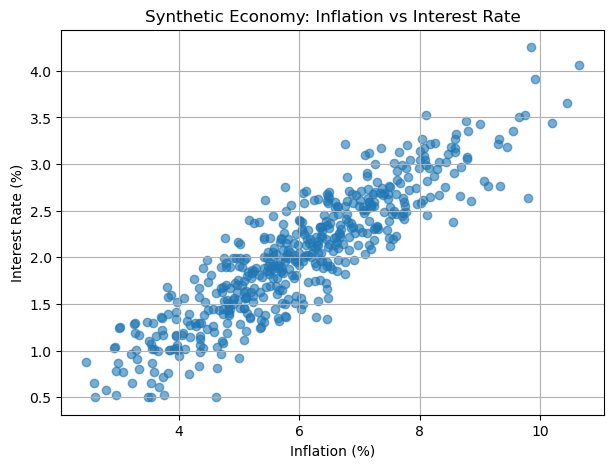

In [6]:
plt.figure(figsize=(7,5))
plt.scatter(df["Inflation"], df["Interest Rate"], alpha=0.6)
plt.title("Synthetic Economy: Inflation vs Interest Rate")
plt.xlabel("Inflation (%)")
plt.ylabel("Interest Rate (%)")
plt.grid(True)
plt.show()

- The ***positive slope*** in this scatter plot demonstrates that <u>interest rates rise when inflation is above its average level</u>.

- This mirrors typical monetary policy behavior: central banks increase rates to contain inflationary pressures.

- The pattern is not perfectly linear, which indicates that the added noise works as intended — interest rates do not respond one-to-one to inflation but fluctuate within a realistic corridor.

### **Correlation Structure of the Synthetic Economy**

To better understand how the variables in our synthetic economy interact with one another, we examine their pairwise correlations.

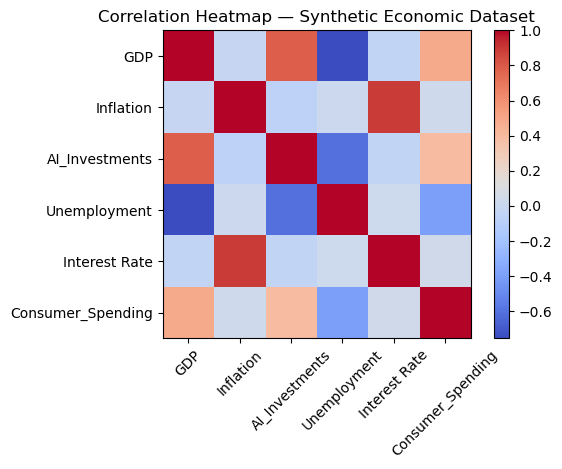

In [7]:
plt.figure(figsize=(6,4))
plt.imshow(df.corr(), cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Correlation Heatmap — Synthetic Economic Dataset")
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()


<u>*The correlation heatmap confirms that the extended synthetic economy behaves as expected:*</u>

- ***GDP and Consumer Spending show a positive correlation***, reflecting the idea that stronger economic output supports higher household demand.

- ***GDP and Unemployment display a clear negative relationship*** (synthetic version of Okun’s law), where rising output is associated with lower unemployment.

- ***Inflation and Interest Rate form a strong positive pair***, indicating that the monetary-policy mechanism built into the data is working: higher inflation leads to higher rates.

- ***AI Investments are moderately tied to GDP***, consistent with the assumption that ***investment activity increases in stronger economies***.

- ***Cross-relationships that were not explicitly modeled appear weak***, which is exactly what we would expect in a clean synthetic setup.

Overall, the heatmap demonstrates that <u>each variable follows the intended economic logic</u>, and the dataset has realistic internal structure suitable for analysis and modeling.

### **What-If Scenario: Simulating a Recession**

To test how robust our synthetic economy is, ***<u>we perform a simple what-if experiment</u>***.

We ***introduce a recession shock by reducing GDP by 15%*** and examine how this affects household spending.

This scenario helps us understand whether the relationships built into the dataset react realistically when the economic environment changes.

In [8]:
# Create a recession scenario: GDP drops by 15%
df["GDP_Shock"] = df["GDP"] * 0.85

# Recalculate consumer spending under recession
df["Consumer_Spending_Shock"] = 0.25 * df["GDP_Shock"] + np.random.normal(0, 4000, n)

In [9]:
# Percentage drop in average consumer spending
avg_spending_base = df["Consumer_Spending"].mean()
avg_spending_recession = df["Consumer_Spending_Shock"].mean()

pct_drop_spending = 100 * (avg_spending_base - avg_spending_recession) / avg_spending_base
print(f"{pct_drop_spending:.3f}%")

13.942%


On average, consumer spending **falls by 13.9%**, which is consistent with the idea that lower national income quickly reduces aggregate demand.

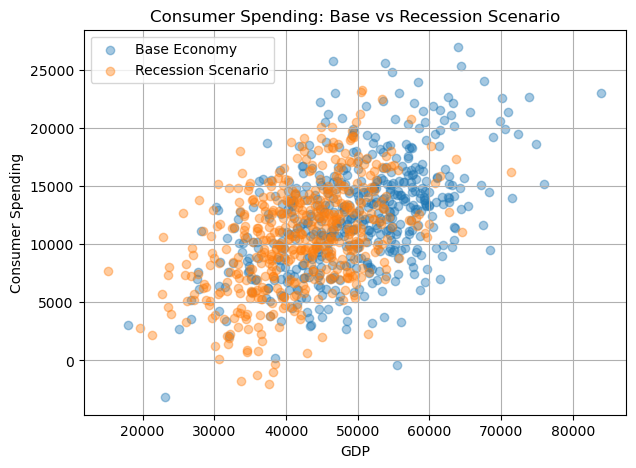

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(df["GDP"], df["Consumer_Spending"], alpha=0.4, label="Base Economy")
plt.scatter(df["GDP_Shock"], df["Consumer_Spending_Shock"], alpha=0.4, label="Recession Scenario")
plt.title("Consumer Spending: Base vs Recession Scenario")
plt.xlabel("GDP")
plt.ylabel("Consumer Spending")
plt.legend()
plt.grid(True)
plt.show()

- The plot clearly shows that ***after the recession shock, consumer spending becomes lower*** at almost every GDP level.

- In other words, when GDP is reduced by 15%, households consistently spend less.

- The magnitude of the drop is not uniform: the scatter remains wide due to the random noise in the spending equation, illustrating that individual households do not react identically to economic downturns.

- Overall, this confirms that our synthetic economy reacts realistically: a ***decline in GDP leads to a meaningful and predictable reduction in household consumption***.

### **Sensitivity Analysis: How Does Spending React to Different GDP Shocks?**

So far, we examined a single recession shock (−15%).

To make the analysis more complete, we explore how the synthetic economy reacts to a whole range of possible GDP shocks, both negative and positive.

This type of sensitivity analysis shows how average consumer spending responds when GDP changes gradually — from a deep recession to a moderate economic boom.

Such curves are often used in policy simulations to understand how sensitive an economy is to fluctuations in output.

In [11]:
# Sensitivity analysis: average spending for different GDP shocks
shock_values = np.linspace(-0.30, 0.20, 13)  # from -30% to +20% in 5% steps
avg_spending = []

for s in shock_values:
    gdp_s = df["GDP"] * (1 + s)
    spending_s = 0.25 * gdp_s + np.random.normal(0, 4000, n)
    avg_spending.append(spending_s.mean())

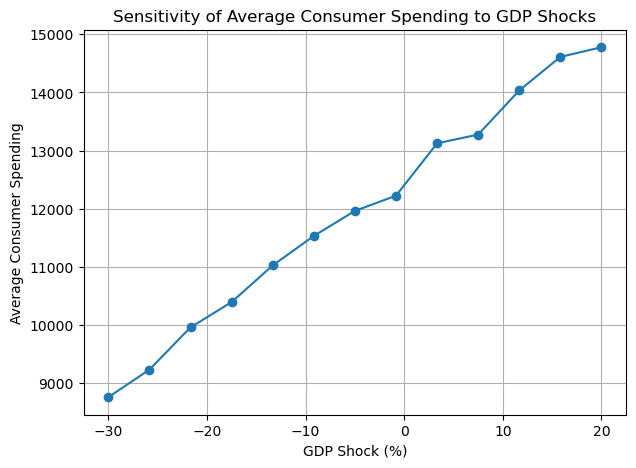

In [12]:
# Plot the sensitivity curve
plt.figure(figsize=(7,5))
plt.plot(shock_values * 100, avg_spending, marker="o")
plt.title("Sensitivity of Average Consumer Spending to GDP Shocks")
plt.xlabel("GDP Shock (%)")
plt.ylabel("Average Consumer Spending")
plt.grid(True)
plt.show()

The sensitivity curve illustrates how the average level of consumer spending reacts to a continuous range of GDP shocks.

**The relationship is almost perfectly linear**, which is consistent with the way the synthetic economy is constructed: household spending is directly proportional to GDP in the generating equation. 

The slight fluctuations in the curve come from the individual-level noise term, capturing the fact that not all households respond identically to macroeconomic changes.
 
Overall, the curve confirms that the synthetic economy behaves in a stable and predictable way: deeper recessions reduce spending, while positive shocks drive it upward in a smooth and gradual way.

### **ML Analysis**

Up to this point we have explored the synthetic economy visually and through simple correlations.  

To go one step further, we use machine-learning models to answer three questions:

1. **Can consumer spending be predicted from macro variables?**  

2. **Which indicators are the most important for explaining spending?**  

3. **Do the models recover the relationships that we intentionally built into the synthetic dataset?**

We compare a simple **Linear Regression** with a more flexible **Random Forest Regressor** and summarise the results.

In [13]:
# 1. Prepare features and target

feature_cols = ["GDP", "Inflation", "AI_Investments", "Unemployment", "Interest Rate"]
features = df[feature_cols]
target = df["Consumer_Spending"]

In [14]:
# 2. Linear Regression model

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

lin_model = LinearRegression()
lin_model.fit(features_scaled, target)

lin_coefs = pd.Series(lin_model.coef_, index=feature_cols)
lin_intercept = lin_model.intercept_
lin_r2 = lin_model.score(features_scaled, target)

In [15]:
# 3. Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(features, target)

rf_r2 = rf_model.score(features, target)
rf_importances = pd.Series(rf_model.feature_importances_, index=feature_cols)

In [21]:
# 4. Summary tables

# Compare overall model performance
model_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R² Score": [lin_r2, rf_r2],
    "Intercept": [lin_intercept, None]
})

model_results

,Model,R² Score,Intercept
0,Linear Regression,0.241957,12325.215982
1,Random Forest,0.882559,NaN


**<u>The Linear Regression model</u>** achieves an R² of about **0.24**, which is expected given the strong noise term included in the spending equation.

Since the predictors were standardized while the target remained in its original units, the intercept represents the average level of consumer spending and is not interpreted further.

The relatively low R² indicates that a purely linear model captures only part of the variation in household spending.

**<u>The Random Forest model</u>** performs significantly better, reaching an R² of **0.88**. 

This suggests that the synthetic economy contains nonlinear patterns that the linear model cannot capture, and that the Random Forest is able to learn these more complex relationships effectively.

In [20]:
# Compare per-feature effects: linear coefficients vs. Random Forest importances
coef_importance_table = pd.DataFrame({
    "Linear Coefficient": lin_coefs,
    "RF Importance": rf_importances
})

coef_importance_table

,Linear Coefficient,RF Importance
GDP,1975.564260,0.361733
Inflation,-223.670353,0.116801
AI_Investments,165.064806,0.176652
Unemployment,-290.634619,0.196983
Interest Rate,476.513746,0.147831


The comparison between linear coefficients (with standardized predictors) and Random Forest importances shows a consistent pattern across models.

Both models clearly identify **GDP** as the strongest predictor of consumer spending. 
This aligns with the way the synthetic dataset was constructed: consumer spending was generated directly from GDP, so the relationship is intentionally dominant.

In the linear model, **unemployment** displays a stable negative coefficient, reflecting its inverse dependence on GDP in the data-generation process.
This effect weakens in the Random Forest model, where unemployment receives a relatively modest importance score, similar to the other secondary indicators.

The remaining macroeconomic indicators - inflation, interest rates, and AI investments - show noticeably smaller effects in both models. 
Their influence appears only because these variables are statistically related to GDP through the synthetic generation process, rather than because they directly determine 
household spending.

In other words, the models correctly recover the causal structure embedded in the dataset: **GDP drives spending**, while the remaining indicators contribute only indirectly through their correlation with GDP or through random variation.

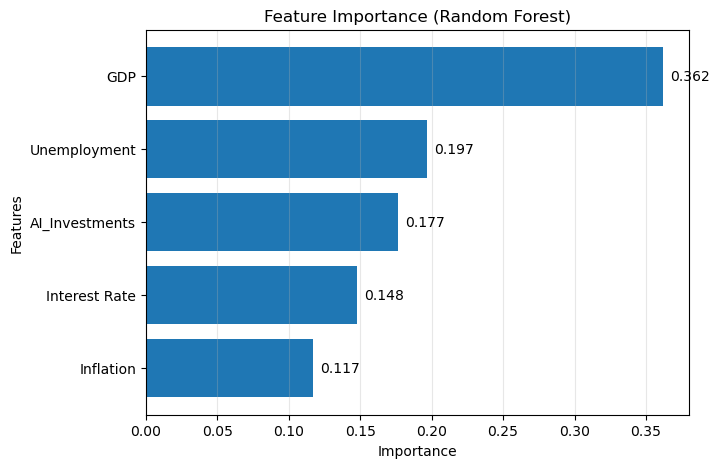

In [19]:
plt.figure(figsize=(7, 5))
importances_sorted= rf_importances.sort_values()
bars = plt.barh(importances_sorted.index, importances_sorted.values)
for i, v in enumerate(importances_sorted.values):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(True, axis="x", alpha=0.3)
plt.show()

### Conclusion

*This project constructed and analyzed a synthetic economic dataset designed to mimic realistic macroeconomic relationships.*

- Through visual exploration, correlation analysis, and scenario simulations, we verified that the generated variables behave consistently with well-known economic principles such as the positive link between GDP and consumption, Okun’s law, and the monetary-policy response of interest rates to inflation.

- A recession what-if experiment and a broader sensitivity analysis demonstrated that the synthetic economy reacts predictably to output shocks, producing stable and economically meaningful adjustments in household spending

- Machine-learning models further confirmed the underlying structure of the dataset: both Linear Regression and Random Forest identified GDP as the dominant driver of consumer spending, while the remaining variables played only secondary, indirect roles.

- The strong performance of the Random Forest model indicates the presence of nonlinearities in the synthetic economy that the linear model cannot capture.

Overall, the project shows that the synthetic dataset is internally coherent, economically interpretable, and robust enough to support both structural reasoning and predictive modeling.